In [ ]:
!pip install deepchem
import deepchem as dc
dc.__version__

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.2/693.2 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 38.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
jax 0.4.23 requires scipy>=1.9, but you have scipy 1.8.1 which is incompatible.
jaxlib 0.4.23+cuda12.cudnn89 requires scipy>=1.9, but you have scipy 1.8.1 which is incompatible.


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


'2.7.1'

In [ ]:
!pip install mols2grid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.3 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
import numpy as np

from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem, DataStructs
from rdkit.Chem import (
    PandasTools,
    Draw,
    Descriptors,
    MACCSkeys,
    rdFingerprintGenerator,
)
import io
from google.colab import files
import mols2grid


In [ ]:
uploaded = files.upload()

Saving BBBP-_2_.xlsx to BBBP-_2_.xlsx


In [ ]:
dfBBBP = pd.read_excel('BBBP-_2_.xlsx')
dfBBBP

,num,name,p_np,smiles
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...
...,...,...,...,...
2045,2049,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl
2046,2050,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...
2047,2051,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...
2048,2052,tofisoline,1,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...


[01:34:18] WARNING: not removing hydrogen atom without neighbors
[01:34:18] WARNING: not removing hydrogen atom without neighbors
[01:34:18] WARNING: not removing hydrogen atom without neighbors
[01:34:18] WARNING: not removing hydrogen atom without neighbors
[01:34:18] WARNING: not removing hydrogen atom without neighbors
[01:34:18] WARNING: not removing hydrogen atom without neighbors
[01:34:18] WARNING: not removing hydrogen atom without neighbors
[01:34:18] WARNING: not removing hydrogen atom without neighbors
[01:34:18] WARNING: not removing hydrogen atom without neighbors
[01:34:18] WARNING: not removing hydrogen atom without neighbors
[01:34:18] WARNING: not removing hydrogen atom without neighbors
[01:34:18] WARNING: not removing hydrogen atom without neighbors
[01:34:18] WARNING: not removing hydrogen atom without neighbors
[01:34:18] WARNING: not removing hydrogen atom without neighbors
[01:34:18] WARNING: not removing hydrogen atom without neighbors
[01:34:18] WARNING: not r

,num,name,p_np,smiles,ROMol
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12,
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...,
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C,
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...,
...,...,...,...,...,...
2045,2049,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl,
2046,2050,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...,
2047,2051,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...,
2048,2052,tofisoline,1,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...,

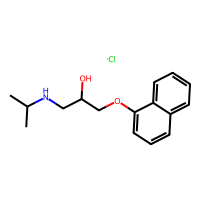
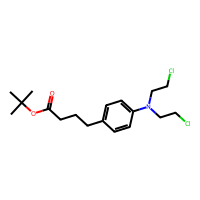
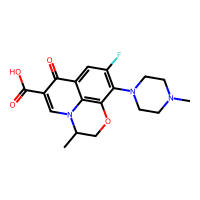
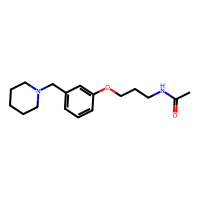
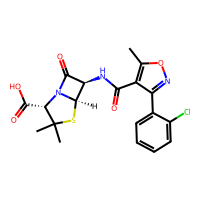
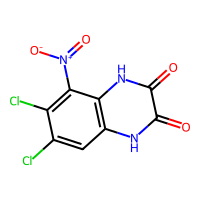
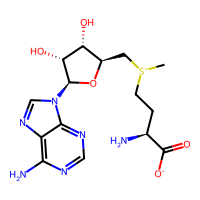
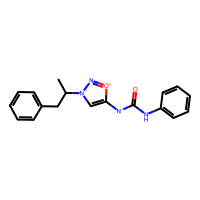
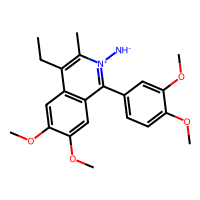
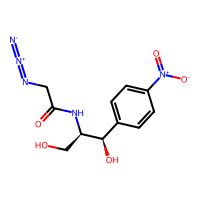

In [ ]:
PandasTools.AddMoleculeColumnToFrame(dfBBBP, smilesCol="smiles")
dfBBBP

In [ ]:
dfBBBP.loc[dfBBBP.ROMol.isnull()]

,num,name,p_np,smiles,ROMol


,num,name,p_np,smiles,ROMol
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12,
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...,
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C,
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...,
...,...,...,...,...,...
2045,2049,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl,
2046,2050,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...,
2047,2051,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...,
2048,2052,tofisoline,1,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...,

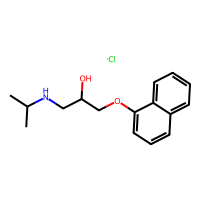
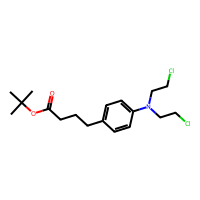
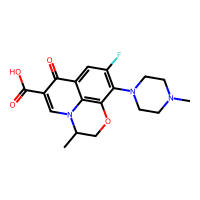
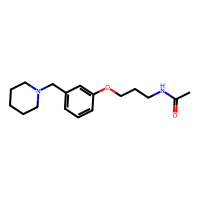
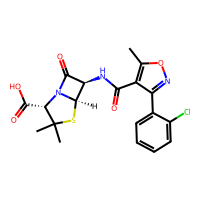
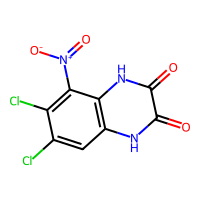
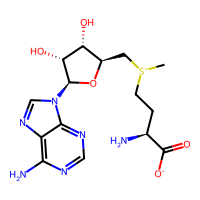
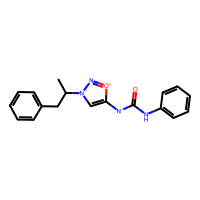
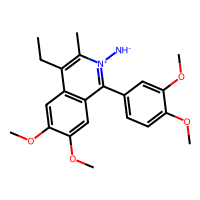
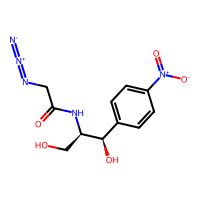

In [ ]:
#Deleting the compounds that does not have ROMol Structures
dfBBBP.drop(dfBBBP.loc[dfBBBP.ROMol.isnull()].index,inplace=True)
dfBBBP

In [ ]:
print('Shape:',dfBBBP.shape)

Shape: (2050, 5)


In [ ]:
#Add Morgan fingerprints (as bit vector) for all molecules to the DataFrame.
dfBBBP["morgan"] = rdFingerprintGenerator.GetFPs(dfBBBP["ROMol"].tolist())

,num,name,p_np,smiles,ROMol,morgan
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C,,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...,,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...
2045,2049,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2046,2050,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2047,2051,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2048,2052,tofisoline,1,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."

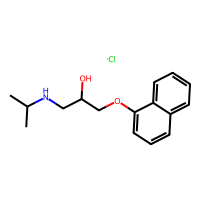
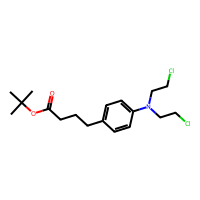
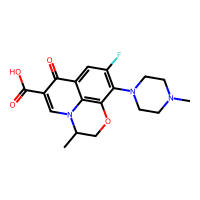
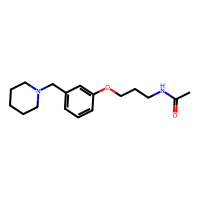
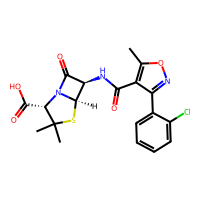
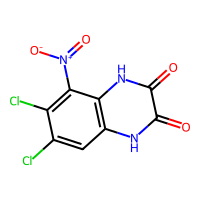
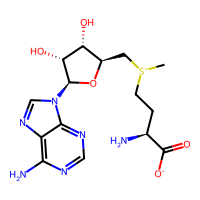
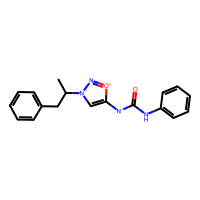
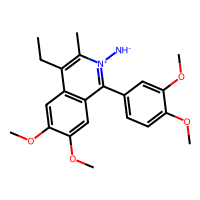
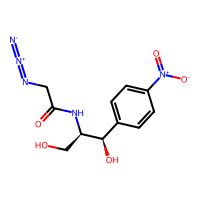

In [ ]:
dfBBBP

In [ ]:
#Searching for duplicated molecules (printing twice for triplicates)
mol_list = []
for smiles in dfBBBP.smiles:
  mol = Chem.MolFromSmiles(smiles)
  mol_list.append(mol)

l_check = []
bi = {}
for x in range(2049):
  fp = AllChem.GetMorganFingerprintAsBitVect(mol_list[x], 2, nBits = 1024, bitInfo = bi)
  for y in range(2048):
    fp2 = AllChem.GetMorganFingerprintAsBitVect(mol_list[y+1], 2, nBits = 1024, bitInfo = bi)
    tanimoto= DataStructs.TanimotoSimilarity(fp,fp2)
    if tanimoto == 1:
      if x < y:
        l_check.append([dfBBBP.index[x+2],dfBBBP.index[y+3],dfBBBP.name[x],dfBBBP.name[y+1],dfBBBP.p_np[x],dfBBBP.p_np[y+1],dfBBBP.num[x],dfBBBP.num[y+1]])
        print([dfBBBP.index[x+2],dfBBBP.index[y+3],'   names: ', dfBBBP.name[x],dfBBBP.name[y+1], '   penetration: ', dfBBBP.p_np[x],dfBBBP.p_np[y+1], '   num: ',dfBBBP.num[x],dfBBBP.num[y+1]])

[01:34:20] WARNING: not removing hydrogen atom without neighbors
[01:34:20] WARNING: not removing hydrogen atom without neighbors
[01:34:20] WARNING: not removing hydrogen atom without neighbors
[01:34:20] WARNING: not removing hydrogen atom without neighbors
[01:34:20] WARNING: not removing hydrogen atom without neighbors
[01:34:20] WARNING: not removing hydrogen atom without neighbors
[01:34:20] WARNING: not removing hydrogen atom without neighbors
[01:34:20] WARNING: not removing hydrogen atom without neighbors
[01:34:20] WARNING: not removing hydrogen atom without neighbors
[01:34:20] WARNING: not removing hydrogen atom without neighbors
[01:34:20] WARNING: not removing hydrogen atom without neighbors
[01:34:20] WARNING: not removing hydrogen atom without neighbors
[01:34:20] WARNING: not removing hydrogen atom without neighbors
[01:34:20] WARNING: not removing hydrogen atom without neighbors
[01:34:20] WARNING: not removing hydrogen atom without neighbors
[01:34:20] WARNING: not r

[3, 593, '   names: ', 'Terbutylchlorambucil', 'Tertbutylchlorambucil', '   penetration: ', 1, 1, '   num: ', 2, 593]
[4, 33, '   names: ', 40730, 'Levofloxacin', '   penetration: ', 1, 1, '   num: ', 3, 32]
[4, 415, '   names: ', 40730, 'Ofloxacin', '   penetration: ', 1, 1, '   num: ', 3, 415]
[5, 667, '   names: ', 24, 24, '   penetration: ', 1, 1, '   num: ', 4, 667]
[12, 268, '   names: ', 'M2L-663581', 35, '   penetration: ', 0, 0, '   num: ', 11, 268]
[14, 435, '   names: ', 18, 'Dichloromethane', '   penetration: ', 1, 1, '   num: ', 13, 435]
[15, 317, '   names: ', 24959, 'Saquinavir', '   penetration: ', 1, 0, '   num: ', 14, 317]
[16, 1904, '   names: ', 'methadone', 'methadone(levomethadone)', '   penetration: ', 1, 1, '   num: ', 15, 1906]
[18, 552, '   names: ', 'BRL53080', 'loperamide', '   penetration: ', 1, 0, '   num: ', 17, 552]
[19, 128, '   names: ', 'hyoscyamine', 'atropine', '   penetration: ', 1, 0, '   num: ', 18, 128]
[19, 1699, '   names: ', 'hyoscyamine', 'a

In [ ]:
#Duplicated molecules with extra line generated by triplicates
dfDUP = pd.DataFrame()
dfDUP['dup'] = l_check
dfDUP

,dup
0,"[3, 593, Terbutylchlorambucil, Tertbutylchlora..."
1,"[4, 33, 40730, Levofloxacin, 1, 1, 3, 32]"
2,"[4, 415, 40730, Ofloxacin, 1, 1, 3, 415]"
3,"[5, 667, 24, 24, 1, 1, 4, 667]"
4,"[12, 268, M2L-663581, 35, 0, 0, 11, 268]"
...,...
90,"[691, 966, Aciclovir, acyclovir/aciclovir, 1, ..."
91,"[700, 1880, methotrimeprazine, levomepromazine..."
92,"[984, 1710, alphamethadol, betamethadol, 1, 1,..."
93,"[1248, 1841, fluocortin, fluocortin-butyl, 1, ..."


In [ ]:
#Unmatching penetration
for lista in l_check:
    if lista[4] != lista[5]:
      print(lista)

[15, 317, 24959, 'Saquinavir', 1, 0, 14, 317]
[18, 552, 'BRL53080', 'loperamide', 1, 0, 17, 552]
[19, 128, 'hyoscyamine', 'atropine', 1, 0, 18, 128]
[52, 301, 'Quinidine', 'Quinine', 1, 0, 51, 301]
[92, 254, 'SB204457', 'Colchicine', 1, 0, 92, 254]
[102, 1009, 'acetylsalicylate', 'aspirin', 0, 1, 102, 1009]
[128, 1699, 'atropine', 'atropine(hyoscyamine)', 0, 1, 128, 1701]
[176, 1643, 'Trimetrexate', 'trimetrexate', 0, 1, 176, 1645]
[267, 1312, 'indomethacin', 'indomethacin(indometacin)', 0, 1, 267, 1314]
[284, 1879, 'levodopa', 'levodopa', 0, 1, 284, 1881]
[305, 1359, 'mequitazine', 'mequitazine', 0, 1, 305, 1361]
[325, 1908, 'Methylprednisolone', 'methylprednisolone', 0, 1, 325, 1910]
[326, 1379, 'Miconazole', 'miconazole', 0, 1, 326, 1381]
[571, 1336, 'loratadine', 'loratadine', 0, 1, 571, 1338]


In [ ]:
#Triplicates
for lista in l_check:
  for lis in l_check:
    if lista[1] == lis[0]:
      print(lis)

[33, 415, 'Levofloxacin', 'Ofloxacin', 1, 1, 32, 415]
[128, 1699, 'atropine', 'atropine(hyoscyamine)', 0, 1, 128, 1701]
[566, 618, 'Y-G15', '5-67', 1, 1, 566, 618]
[565, 617, 'Y-G14', '5-66', 1, 1, 565, 617]
[341, 1703, 'Org4428', 'beloxepin', 1, 1, 341, 1705]
[269, 569, '1-47', 'Y-G20', 0, 0, 269, 569]
[534, 1539, 'SKF101468', 'ropinirole', 1, 1, 534, 1541]


In [ ]:
#Only first occurrence for each duplicated molecules (with matching penetration)
for lista in dfDUP.iterrows():
  if lista[1][0][4] != lista[1][0][5]:
    dfDUP.drop(lista[0],inplace=True)
  if lista[1][0][0] == 33 or lista[1][0][0] == 566 or lista[1][0][0] == 565 or lista[1][0][0] == 341 or lista[1][0][0] == 269 or lista[1][0][0] == 534:
    if lista[1][0][1] == 415 or lista[1][0][1] == 618 or lista[1][0][1] == 617 or lista[1][0][1] == 1703 or lista[1][0][1] == 569 or lista[1][0][1] == 1539:
      dfDUP.drop(lista[0],inplace=True)
dfDUP

,dup
0,"[3, 593, Terbutylchlorambucil, Tertbutylchlora..."
1,"[4, 33, 40730, Levofloxacin, 1, 1, 3, 32]"
2,"[4, 415, 40730, Ofloxacin, 1, 1, 3, 415]"
3,"[5, 667, 24, 24, 1, 1, 4, 667]"
4,"[12, 268, M2L-663581, 35, 0, 0, 11, 268]"
...,...
90,"[691, 966, Aciclovir, acyclovir/aciclovir, 1, ..."
91,"[700, 1880, methotrimeprazine, levomepromazine..."
92,"[984, 1710, alphamethadol, betamethadol, 1, 1,..."
93,"[1248, 1841, fluocortin, fluocortin-butyl, 1, ..."


In [ ]:
lRemove = []
for lista in dfDUP.iterrows():
  lRemove.append(lista[1][0][7])
for lista in l_check:
    if lista[4] != lista[5]:
      if lista[0] == 15 or lista[0] == 18 or lista[0] == 52 or lista[0] == 92 or lista[0] == 176 or lista[0] == 267 or lista[0] == 305 or lista[0] == 326 or lista[0] == 571:
        lRemove.append(lista[6])
      if lista[1] == 128 or lista[1] == 1009 or lista[1] == 1879 or lista[1] == 1908:
        lRemove.append(lista[7])
lRemove

[593,
 32,
 415,
 667,
 268,
 435,
 1906,
 1701,
 455,
 673,
 337,
 668,
 533,
 488,
 566,
 618,
 508,
 457,
 690,
 489,
 565,
 617,
 592,
 671,
 394,
 591,
 433,
 535,
 342,
 672,
 341,
 1705,
 269,
 569,
 534,
 1541,
 338,
 453,
 670,
 339,
 669,
 388,
 312,
 340,
 271,
 1947,
 864,
 1462,
 246,
 1979,
 1508,
 731,
 1597,
 2031,
 2045,
 1388,
 1916,
 1567,
 651,
 1662,
 959,
 1073,
 1111,
 1085,
 619,
 1471,
 1005,
 1583,
 1971,
 1795,
 966,
 1882,
 1712,
 1843,
 2042,
 14,
 17,
 128,
 51,
 92,
 1009,
 176,
 267,
 1881,
 305,
 1910,
 326,
 571]

,num,name,p_np,smiles,ROMol,morgan
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C,,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...,,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...
2045,2049,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2046,2050,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2047,2051,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2048,2052,tofisoline,1,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."

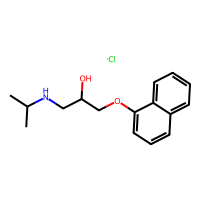
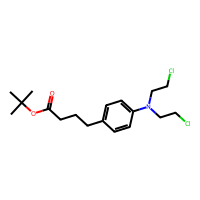
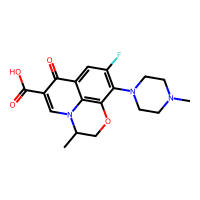
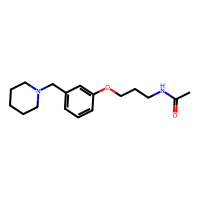
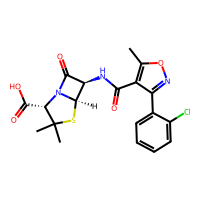
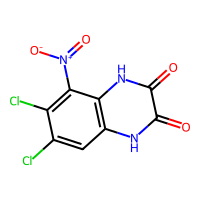
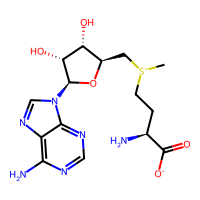
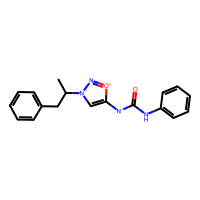
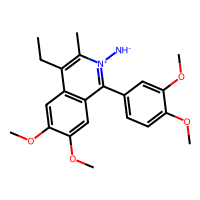
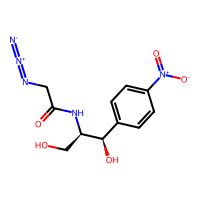

In [ ]:
for el in lRemove:
  dfBBBP.drop(dfBBBP.loc[dfBBBP.num == el].index, inplace = True)
dfBBBP

In [ ]:
dfBBBP.loc[dfBBBP.p_np == 1, ['w']] = 1.2162565249813573
dfBBBP.loc[dfBBBP.p_np == 0, ['w']] = 5.624137931034483
dfBBBP

,num,name,p_np,smiles,ROMol,morgan,w
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12,<rdkit.Chem.rdchem.Mol object at 0x7dccbd18e8f0>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.216257
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,<rdkit.Chem.rdchem.Mol object at 0x7dccbd18e810>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.216257
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...,<rdkit.Chem.rdchem.Mol object at 0x7dccbd18e880>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",1.216257
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C,<rdkit.Chem.rdchem.Mol object at 0x7dccbd18e9d0>,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",1.216257
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...,<rdkit.Chem.rdchem.Mol object at 0x7dccbd18ef10>,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.216257
...,...,...,...,...,...,...,...
2045,2049,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl,<rdkit.Chem.rdchem.Mol object at 0x7dccbd0b6f10>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.216257
2046,2050,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...,<rdkit.Chem.rdchem.Mol object at 0x7dccbd0b6f80>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.216257
2047,2051,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...,<rdkit.Chem.rdchem.Mol object at 0x7dccbd0b6ff0>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.216257
2048,2052,tofisoline,1,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...,<rdkit.Chem.rdchem.Mol object at 0x7dccbd0b7060>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.216257


In [ ]:
!pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 2.7 MB/s eta 0:00:00


In [ ]:
PandasTools.SaveXlsxFromFrame(dfBBBP,'BBBP_Curated.xlsx',size=(150,150))
files.download('BBBP_Curated.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>